In [115]:

import numpy as np
import pylab as plb
import random as rand
plb.rcParams['figure.figsize'] = 12,8

N = 200      # The number of Rooms
t = 4000000  # Hom many seeds?
d = 1      # Iteration of Code
StopNo = 30 #number of stops
Samples = [] 
Stops = np.array([t/(1.4**k) for k in range(StopNo,-1,-1)],int)

# Must not contain 0 ...
h_ave = []
Ws = [[] for i in range(StopNo+1)]

print(Stops)
def Visualize(xAxis,width,n,*args):
    for i,LIST in enumerate(args):
        if i==0:
            plb.bar(xAxis,LIST,width)
        else:
            bottom = [[args[j][k] for k in range(n)] for j in range(0, len(args) ) if j<i]
            bottom = np.array(bottom)
            Key = np.zeros(n,int)
            for B in bottom:
                Key += B
            plb.bar(xAxis,LIST,width,bottom = Key.tolist())
            plb.title("The distribution of particles in all Places",fontsize=16)
            plb.xlabel("Place",fontsize=14)
            plb.ylabel("Cumulative Count of Particles",fontsize=14)
    plb.show()
    
def Find_End(r,N,Rooms):
    Set = { Rooms[r-1] , Rooms[r] , Rooms[(r+1)%N] }
    minh = min(Set)
    if Rooms[r] == minh :
        return r
    elif  Rooms[r-1] == Rooms[(r+1)%N] == minh :
        return rand.choice([r-1,(r+1)%N])
    elif minh == Rooms[r-1]:
        return r-1
    else:
        return (r+1)%N


for Iterations in range(0,d):
    Rooms = [0]*N
    Samples = []
    W_Counter = 0
    for i in range(t+1):
        r = rand.randint(0,N-1)
        ind = Find_End(r,N,Rooms)
        Rooms[ind] += 1 
        
        
        if i in Stops:
            Samples.append(Rooms[::1])  #Why do that?
            h_ave.append(round(np.mean(np.array(Rooms)),2))
            (Ws[W_Counter]).append( np.sqrt(np.var(Rooms)) )
            W_Counter+=1

#Uncomment here to see the visualization
"""
Visualize(np.arange(N),1,N,*Samples)

for No,data in enumerate(Samples):
    print('In {} level of {} iterations w(t) is {:.3f}'.format(Stops[No],t,np.sqrt(np.var(data))))

"""


[    165     231     323     453     634     888    1244    1742    2439
    3414    4780    6693    9370   13118   18365   25712   35997   50395
   70554   98776  138286  193601  271041  379458  531241  743737 1041232
 1457725 2040816 2857142 4000000]


"\nVisualize(np.arange(N),1,N,*Samples)\n\nfor No,data in enumerate(Samples):\n    print('In {} level of {} iterations w(t) is {:.3f}'.format(Stops[No],t,np.sqrt(np.var(data))))\n\n"

 
0.2839 x - 0.896 is the line equation in non-saturated state
y = 0.4884 is the line equation in saturated
(ts , ws) = (75125.1269,3.0789)


'p = np.polyfit(Xs,Ys,1)\n\np = np.poly1d(p) # (Betta)x+A\nA=10**(p.c[1])\nplb.plot(Xs,p(Xs),label="The Best fitted Line",c="r")\nplb.legend()\nprint("β is {:.6f} and A is {:.6f} in equation: W ~ At^β".format(p.c[0],A))\n\nprint(Xs,Ys)'

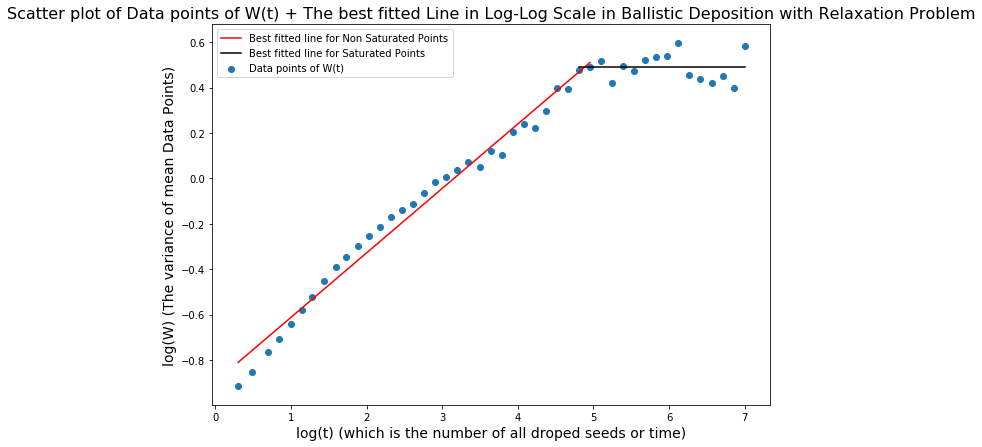

In [118]:
# You can get the datas by running the code Above for many times the run this cell
plb.rcParams['figure.figsize'] = 10,7
"""
#H average plot code
print(h_ave)
dt = []
for k in range(10):
    dt.append((Stops[k],h_ave[k] ))
Xs = np.array([d[0] for d in dt])
Ys = np.array([d[1] for d in dt])

plb.scatter(Xs,Ys,label="Data points of average height")
plb.legend()
plb.title("The plot of average height in Random Ballistic Deposition Problem with relaxation",fontsize=16)
plb.xlabel("t (which is the number of all droped seeds or time)",fontsize=14)
plb.ylabel("average height",fontsize=14)

p = np.polyfit(Xs,Ys,1)
p = np.poly1d(p)
plb.plot(Xs,Ys)
print(p)
"""
Data = []
# the data was grabed by running first cell and then copying them here ... manually
Data1 = [(2, 0.1216), (3, 0.14), (5, 0.1706), (7, 0.196), (10, 0.228), (14, 0.2634), (19, 0.3), (27, 0.347), (39, 0.4), (54, 0.4465), (76, 0.4968), (107, 0.5731), (150, 0.6442), (210, 0.6942), (295, 0.7208), (413, 0.7843), (578, 0.8509), (809, 1.0087), (1133, 1.0822), (1587, 1.2151), (2222, 1.4113), (3111, 1.4479), (4355, 1.5204), (6097, 1.3564), (8537, 1.5633), (11951, 1.6317), (16732, 1.5725), (23425, 2.1733), (32796, 2.3843), (45914, 3.2007), (64280, 3.6402), (89992, 2.9889), (125989, 3.4666), (176385, 3.221), (246940, 2.1995), (345716, 2.0231), (484002, 3.6131), (677603, 5.4018), (948645, 3.1284), (1328103, 5.0319), (1859344, 3.2984), (2603082, 4.948), (3644314, 3.1835), (5102040, 3.6212), (7142857, 2.1038), (10000000, 2.6125)]
Data2 = [(2, 0.1216), (3, 0.14), (5, 0.1706), (7, 0.196), (10, 0.228), (14, 0.2634), (19, 0.3), (27, 0.347), (39, 0.4), (54, 0.4465), (76, 0.5165), (107, 0.5731), (150, 0.6285), (210, 0.6723), (295, 0.7871), (413, 0.7779), (578, 0.8741), (809, 0.9631), (1133, 1.0446), (1587, 1.1074), (2222, 0.9807), (3111, 0.9573), (4355, 1.1453), (6097, 1.3784), (8537, 1.8558), (11951, 2.0597), (16732, 1.3938), (23425, 1.9295), (32796, 2.2102), (45914, 2.0963), (64280, 2.6591), (89992, 2.1986), (125989, 2.769), (176385, 2.6599), (246940, 2.8684), (345716, 4.1247), (484002, 3.5489), (677603, 2.4514), (948645, 3.8062), (1328103, 2.2956), (1859344, 3.4043), (2603082, 2.8553), (3644314, 2.2526), (5102040, 2.695), (7142857, 2.4302), (10000000, 3.0422)]
Data3 = [(2, 0.1216), (3, 0.14), (5, 0.1706), (7, 0.196), (10, 0.228), (14, 0.2634), (19, 0.3), (27, 0.347), (39, 0.4), (54, 0.4465), (76, 0.4968), (107, 0.537), (150, 0.6285), (210, 0.6797), (295, 0.7277), (413, 0.8032), (578, 0.8966), (809, 0.9836), (1133, 0.9752), (1587, 1.0278), (2222, 1.2376), (3111, 1.2274), (4355, 1.1232), (6097, 1.1874), (8537, 1.4505), (11951, 2.0742), (16732, 2.1243), (23425, 1.8636), (32796, 2.9588), (45914, 2.815), (64280, 2.5261), (89992, 2.134), (125989, 3.7547), (176385, 3.6736), (246940, 3.0721), (345716, 2.6857), (484002, 2.5874), (677603, 2.7784), (948645, 4.2541), (1328103, 2.9715), (1859344, 1.8274), (2603082, 2.4764), (3644314, 2.5089), (5102040, 2.9211), (7142857, 1.9585), (10000000, 3.4007)]
Data4 = [(2, 0.1216), (3, 0.14), (5, 0.1706), (7, 0.196), (10, 0.228), (14, 0.2634), (19, 0.3), (27, 0.3611), (39, 0.4123), (54, 0.4576), (76, 0.5067), (107, 0.5463), (150, 0.5788), (210, 0.6723), (295, 0.6997), (413, 0.7451), (578, 0.8331), (809, 0.9367), (1133, 0.9804), (1587, 1.0327), (2222, 1.1497), (3111, 0.9932), (4355, 1.4041), (6097, 1.2124), (8537, 1.5855), (11951, 1.4705), (16732, 1.6287), (23425, 1.9502), (32796, 2.503), (45914, 2.1574), (64280, 3.0661), (89992, 4.044), (125989, 3.1965), (176385, 1.7903), (246940, 3.7253), (345716, 3.0353), (484002, 3.4561), (677603, 3.2588), (948645, 3.0161), (1328103, 4.6829), (1859344, 2.8652), (2603082, 1.7184), (3644314, 2.5912), (5102040, 2.4501), (7142857, 3.0308), (10000000, 4.9965)]
Data5 = [(2, 0.1216), (3, 0.14), (5, 0.1706), (7, 0.196), (10, 0.228), (14, 0.2634), (19, 0.3), (27, 0.3611), (39, 0.4123), (54, 0.4576), (76, 0.5067), (107, 0.5463), (150, 0.5788), (210, 0.6723), (295, 0.6997), (413, 0.7451), (578, 0.8331), (809, 0.9367), (1133, 0.9804), (1587, 1.0327), (2222, 1.1497), (3111, 0.9932), (4355, 1.4041), (6097, 1.2124), (8537, 1.5855), (11951, 1.4705), (16732, 1.6287), (23425, 1.9502), (32796, 2.503), (45914, 2.1574), (64280, 3.0661), (89992, 4.044), (125989, 3.1965), (176385, 1.7903), (246940, 3.7253), (345716, 3.0353), (484002, 3.4561), (677603, 3.2588), (948645, 3.0161), (1328103, 4.6829), (1859344, 2.8652), (2603082, 1.7184), (3644314, 2.5912), (5102040, 2.4501), (7142857, 3.0308), (10000000, 4.9965)]

for r in range(len(Data1)):
    Data.append( (Data1[r][0],round(np.mean(np.array(([Data1[r][1],Data2[r][1],Data3[r][1],Data4[r][1],Data5[r][1]]),dtype = float)),3 )) )

Xs = np.array([d[0] for d in Data])
Ys = np.array([d[1] for d in Data])
Xs = np.log10(Xs)
Ys = np.log10(Ys)

plb.scatter(Xs,Ys,label="Data points of W(t)")

plb.title("Scatter plot of Data points of W(t) + The best fitted Line in Log-Log Scale in Ballistic Deposition with Relaxation Problem",fontsize=16)
plb.xlabel("log(t) (which is the number of all droped seeds or time)",fontsize=14)
plb.ylabel("log(W) (The variance of mean Data Points)",fontsize=14)

Coef = plb.polyfit(Xs[:32],Ys[:32],1)
p = plb.poly1d(Coef)

# it mat be see boring when you see that i write the code brute force but for d>5 this code has more than 5 minute runtime ...

plb.plot(Xs[:32],p(Xs[:32]),label="Best fitted line for Non Saturated Points",c="r")
Const = np.mean(Ys[32:])
plb.plot(Xs[30:],[Const]*16,label="Best fitted line for Saturated Points",c="black")

print(p, 'is the line equation in non-saturated state')
print('y = {:.4f}'.format(Const), 'is the line equation in saturated')
ts = (Const - Coef[1])/ Coef[0]
ws = p(ts)
print('(ts , ws) = ({:.4f},{:.4f})'.format(10**(ts),10**(ws)))
plb.legend()

"""p = np.polyfit(Xs,Ys,1)

p = np.poly1d(p) # (Betta)x+A
A=10**(p.c[1])
plb.plot(Xs,p(Xs),label="The Best fitted Line",c="r")
plb.legend()
print("\u03B2 is {:.6f} and A is {:.6f} in equation: W ~ At^\u03B2".format(p.c[0],A))

print(Xs,Ys)"""